# Exploring Time Series

[▲ Overview](0.0-Overview.ipynb)

[◀ Extracting Time Series](2.1-Extracting-timeseries.ipynb)

[▶ Linear Model](4.0-Linear-model.ipynb)

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt

In [3]:
from australian_housing import paths

## Data Loading and Time Series Plots

In [4]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0)
ts.head()

,Value
Time,
2011-07-01,1511.0
2011-08-01,1634.0
2011-09-01,1561.0
2011-10-01,1485.0
2011-11-01,1594.0


In [5]:
ts.describe()

,Value
count,73.000000
mean,2009.547945
std,489.417115
min,982.000000
25%,1594.000000
50%,2007.000000
75%,2461.000000
max,3006.000000


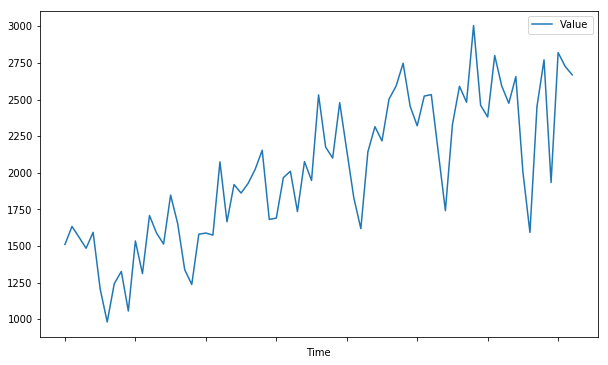

In [6]:
ts.plot(figsize=(10,6));

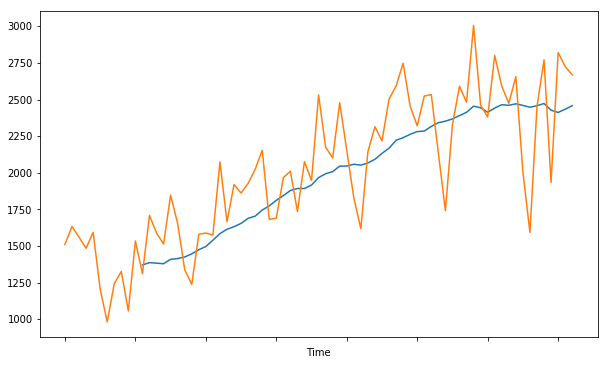

In [7]:
plt.figure(figsize=(10,6))
values = ts.Value
values.rolling(12).mean().plot(label='12-Month Rolling Mean')
values.plot();

### Time series plot interpretation
A first glance at the time series plot reveals an *upwards trend* in the number of housings approved in New South Wales. A little less obvious, but still visible is a *slight seasonality*. Given this is a monthly timeseries and building houses is a business that depends on the season of the year, a first guess would be *seasonality of 12 months*. 

## Seasonal Decomposition

In [8]:
res = seasonal_decompose(ts, model='additive', freq=12)

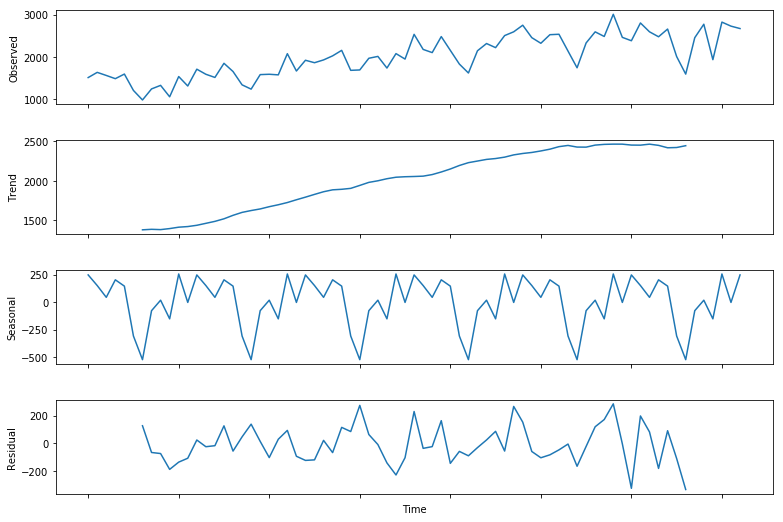

In [9]:
fig = res.plot()
fig.set_size_inches((12,8))

In [10]:
(res.seasonal == res.seasonal.min()).head(12)

,Value
Time,
2011-07-01,False
2011-08-01,False
2011-09-01,False
2011-10-01,False
2011-11-01,False
2011-12-01,False
2012-01-01,True
2012-02-01,False
2012-03-01,False


The minimum of houses approved seems to appear in January of each year.

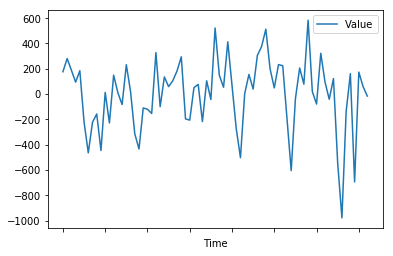

In [11]:
detrend(ts).plot();

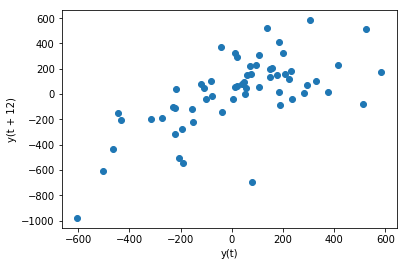

In [12]:
lag_plot(detrend(ts), lag=12);

## Autocorrelation

The lag plot with a lag of 12 months shows a positive relationship, which is further indication for 12-month seasonality.

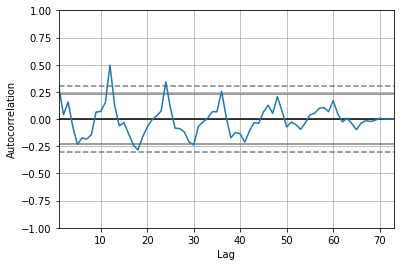

In [13]:
autocorrelation_plot(detrend(ts));

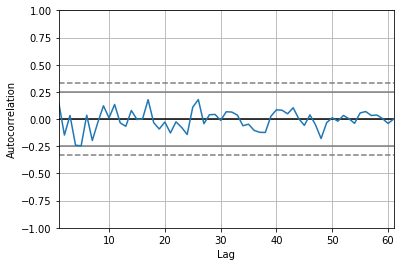

In [14]:
autocorrelation_plot(res.resid[~res.resid['Value'].isna()]);

### Autocorrelation plot interpretation
Autocorrelation of the trend adjusted time series peaks at *multiples of 12* (months). This confirms the initial guess of a yearly seasonality. However, after removing the seasonal influence (based on the assumption of a 12-month seasonality), autocorrelation is reduced significantly. One may conclude that there is little or no autocorrelation left after correcting for seasonality.

[▲ Overview](0.0-Overview.ipynb)

[◀ Extracting Time Series](2.1-Extracting-timeseries.ipynb)

[▶ Linear Model](4.0-Linear-model.ipynb)